In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import slopestabilitytools
import math
from scipy import interpolate

In [7]:
def mov_avg(array, window_length, *, method='same'):
    array_avg = np.convolve(array, np.ones(window_length), method) / window_length
    return array_avg

In [3]:
test_result = pd.read_csv('../results/data/hor_12.csv')

In [4]:
x = test_result['X']
y = test_result['Y']
result = test_result['RESN']
data = {'result': result}

xi, yi, data_gridded = slopestabilitytools.grid_data(x, y, data, regular_grid=True)

result_grid = data_gridded['result']

In [13]:
gradient = np.gradient(result_grid, axis=0)
gradient2 = np.gradient(gradient, axis=0)
gradient2 = gradient2/np.amax(gradient2)
ind = gradient2 < 0.15
gradient2[ind] = 1

inds = np.zeros(gradient2.T.shape[0])
classes = np.zeros_like(gradient2.T)
print(gradient2.T.shape[1])
for num, column in enumerate(gradient2.T):
    #print(num)
    inds[num] = np.argmax(column)
inds = mov_avg(inds, math.ceil(len(inds)/10))
for num, column in enumerate(classes):
    column[:int(inds[num])] = 0
classes = classes.T

300


300
[0 0 3 4 5]


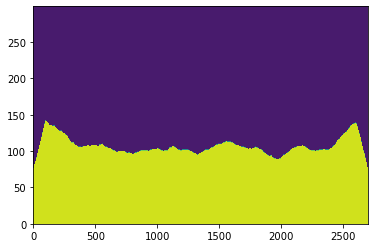

In [14]:
print(gradient2.T.shape[1])
temp = np.array([1,2,3,4,5])
temp[:2] = 0
print(temp)
plt.contourf(classes)

In [20]:
classes_interp_f = interpolate.interp2d(xi, yi, classes)
classes_interp = np.zeros_like(x)
for cell_id in range(len(x)):
    classes_interp[cell_id] = classes_interp_f(x[cell_id], y[cell_id])